In [709]:
import numpy as np
import matplotlib.pyplot as plt
#import numpy and matplotlib

## Part 1:  Linear regression for classifying noisy data.

In [710]:
N = 200
d = 2
iterations = 100

In [711]:
def get_training_data(N,d):
    X = np.random.uniform(-1,1,size=(N,d+1)) #get random training points
    X[:,0] = 1 #set first value in each tuple equal to 1
    return X

**Create functions for target and hypothesis function generation, PLA and pocket algorithms, data alteration, and plotting**

In [712]:
def get_target_func(d):
    ## Generate random target function: f(x) = w^T x 
    w = np.random.uniform(-1,1,size=(d+1))
    return w

In [713]:
def compute_true_value(X,w):
    ## Compute true labels for the training data
    Y = np.sign(np.dot(X,w))
    ind_pos = np.where(Y==1)[0] ## positive examples
    ind_neg = np.where(Y==-1)[0] ## negative examples
    return Y,ind_pos,ind_neg

In [714]:
def get_noisy_data(noise_percentage, num_data, Y_data):
    num_noisy_points = int(np.ceil((noise_percentage * num_data) / 100)) #get the number of noisy point based on the given percentage and number of data points
    ind = np.random.choice(num_data,num_noisy_points)
    Y_data[ind] *= -1
    ind_pos = np.where(Y_data==1)[0] ## positive examples
    ind_neg = np.where(Y_data==-1)[0] ## negative examples
    return Y_data, ind_pos, ind_neg

In [715]:
def get_hyp_func(d):
    g = np.random.uniform(-1,1,size=(d+1))
    return g

In [716]:
def perceptron(g,f,X,f_true_vals, maxiter):
    hyp_true_vals, h_pos,h_neg = compute_true_value(X,g)
    iterations = 0
    Ein = np.zeros(maxiter)
    while not np.array_equal(hyp_true_vals,f_true_vals):
        if iterations >= maxiter:
            break
        for index, v in enumerate(hyp_true_vals): #find a misclassified example
            if v != f_true_vals[index]:
                break
        g = g + (X[index] * f_true_vals[index]) #otherwise, fix seperator
        hyp_true_vals = np.sign(np.dot(X,g)) #get new labeled values of training set
        
        mislabeled_points = 0
        for index, value in enumerate(f_true_vals):
            if hyp_true_vals[index] != value:
                mislabeled_points += 1
        Ein[iterations] = mislabeled_points / N
        iterations += 1
    return g, iterations, Ein


In [717]:
def pocket(g,f,X,f_true_vals, maxiter):
    hyp_true_vals, h_pos,h_neg = compute_true_value(X,g)
    iterations = 0
    Ein_currentbest = 1.0; 
    Ein = np.zeros(maxiter)
    while not np.array_equal(hyp_true_vals,f_true_vals):
        if iterations >= maxiter:
            break
        for index, v in enumerate(hyp_true_vals): #find a misclassified example
            if v != f_true_vals[index]:
                break
        g = g + (X[index] * f_true_vals[index]) #otherwise, fix seperator
        hyp_true_vals = np.sign(np.dot(X,g)) #get new labeled values of training set
        
        mislabeled_points = 0
        for index, value in enumerate(f_true_vals):
            if hyp_true_vals[index] != value:
                mislabeled_points += 1
        Ein[iterations] = mislabeled_points / N
        if Ein[iterations] < Ein_currentbest:
            Ein_currentbest = Ein[iterations]
            w_currentbest = g
        Ein[iterations] = Ein_currentbest
        iterations += 1
    return w_currentbest, iterations, Ein, Ein_currentbest


In [718]:
def lin_regression(X, data_labels, f_non_noise_labels,):
    Xdag = np.matmul( np.linalg.pinv(np.matmul(X.transpose(), X)), X.transpose() )
    w = np.matmul(Xdag, data_labels)

    hyp_true_vals,h_pos,h_neg = compute_true_value(X,w)
    mislabeled_points = 0
    for index, value in enumerate(f_non_noise_labels):
        if hyp_true_vals[index] != value:
            mislabeled_points += 1
    E_in = mislabeled_points / N
    return w, E_in


In [719]:
def plot_pla(X, ind_pos, ind_neg, f, g, d , N, iterations):
    x_data = np.linspace(-1,1)
    f_y_data = ((-(f[1]/ f[2]) * x_data - (f[0]/f[2])))
    g =((-(g[1]/ g[2]) * x_data - (g[0]/g[2])))
    plt.clf()
    plt.plot(X[ind_pos,1],X[ind_pos,2],'ro') #plot pos points
    plt.plot(X[ind_neg,1],X[ind_neg,2],'bx') #plot neg points
    plt.plot(x_data,f_y_data, "-g", label="Target function") #plot target func
    plt.plot(x_data,g, "-y", label="Hypothesis function") #plot hypothesis func

    plt.plot()
    
    title = "For N = " + str(N) + " and d = " + str(d) + ": " + str(iterations) + " total iterations" #formatting
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training Data - X values")
    plt.ylabel("Training Data - Y output values")

In [720]:
def plot_lin_regr(X,ind_pos,ind_neg,f,g,d,N,Ein):
    x_data = np.linspace(-1,1)
    f_y_data = ((-(f[1]/ f[2]) * x_data - (f[0]/f[2])))
    x_dag_data =((-(g[1]/ g[2]) * x_data - (g[0]/g[2])))
    plt.plot(x_data,x_dag_data, "-y", label="w")
    plt.plot(X[ind_pos,1],X[ind_pos,2],'ro') #plot pos points
    plt.plot(X[ind_neg,1],X[ind_neg,2],'bx') #plot neg points
    plt.plot(x_data,f_y_data, "-g", label="Target function") #plot target func
    plt.legend(loc="best")
    plt.xlabel("Training Data - X values")
    plt.ylabel("Training Data - Y output values")
    title = "E_in value for Linear Regression was " + str(Ein)
    plt.title(title)

In [721]:
def plot_error(Ein,alg):
    x = np.arange(0,np.size(Ein))
    if alg  == "pla":
        plt.plot(x,Ein,label="E_in for PLA Algorithm")
        title = "Last E_in value for PLA version was " + str(Ein[len(Ein)-1])
    else:
        plt.plot(x,Ein,label="E_in for Pocket PLA Algorithm")
        title = "Best E_in value for Pocket version was " + str(Ein[len(Ein)-1])
    plt.title(title)
    plt.xlabel("Iteration Number")
    plt.ylabel("E_In")


___
## Part 1a: 5% noise
Create target function, initial hypothesis value, gather Y data, and make 5% of data points noisy

In [722]:
noise_level = 5

no_noise_data = get_training_data(N,d)
target_function = get_target_func(d)

Y_data, ind_pos, ind_neg = compute_true_value(no_noise_data,target_function)
noisy_data, ind_n_pos,ind_n_neg = get_noisy_data(noise_level,N,Y_data)

random_hypothesis = get_hyp_func(d)

**Run Perceptron Learning Alg with 5% noisy data for 100 Iterations**

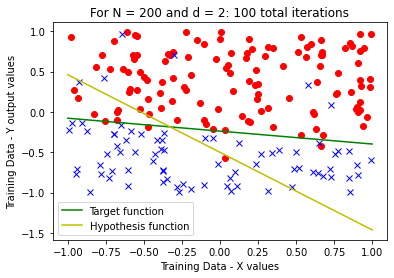

In [723]:
g, iterations, pla_Ein = perceptron(random_hypothesis, target_function,no_noise_data,noisy_data,iterations) #get data for PLA algorithm
plot_pla(no_noise_data,ind_n_pos,ind_n_neg,target_function,g,d,N,iterations) #plot PLA algorithm

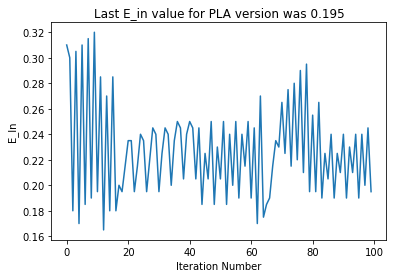

In [724]:
plot_error(pla_Ein, "pla") #plot error of PLA algorithm

**Run Pocket Algorithm (storing best w and E_in) with 5% noisy data for 100 Iterations**

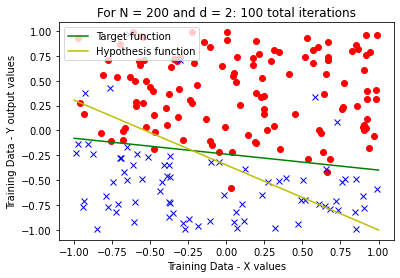

In [725]:
g_pocket, iterations_pocket, pocket_Ein,best_pocket_Ein = pocket(random_hypothesis, target_function,no_noise_data,noisy_data,iterations)
plot_pla(no_noise_data,ind_n_pos,ind_n_neg,target_function,g_pocket,d,N,iterations) #plot pocket algorithm

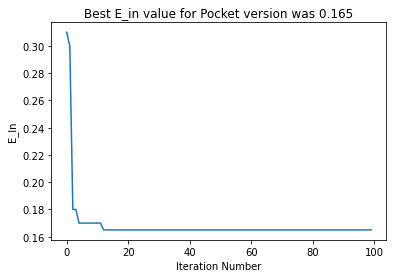

In [726]:
plot_error(pocket_Ein,"pocket")

 **Run Linear Regression for 5% noise**

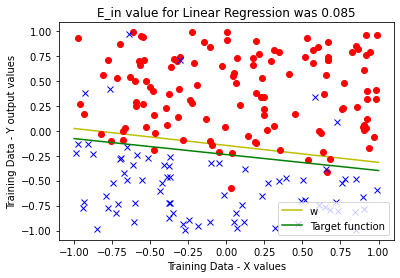

In [727]:
g_lin_regr, Ein = lin_regression(no_noise_data, noisy_data, Y_data)
plot_lin_regr(no_noise_data,ind_n_pos,ind_n_neg,target_function,g_lin_regr,d,N,Ein)

___
## Part 1b: 10% Noise

In [728]:
noise_level = 10

no_noise_data = get_training_data(N,d)
target_function = get_target_func(d)

Y_data, ind_pos, ind_neg = compute_true_value(no_noise_data,target_function)
noisy_data, ind_n_pos,ind_n_neg = get_noisy_data(noise_level,N,Y_data)

random_hypothesis = get_hyp_func(d)

**Run PLA for noise = 10%**

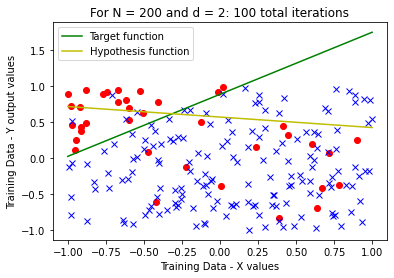

In [729]:
g, iterations, pla_Ein = perceptron(random_hypothesis, target_function,no_noise_data,noisy_data,iterations) #get data for PLA algorithm
plot_pla(no_noise_data,ind_n_pos,ind_n_neg,target_function,g,d,N,iterations) #plot PLA algorithm

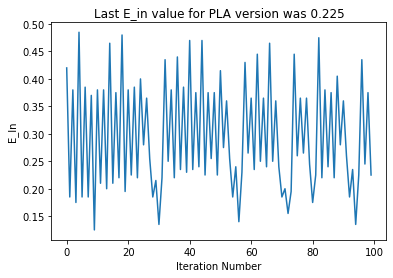

In [730]:
plot_error(pla_Ein, "pla") #plot error of PLA algorithm

**Run Pocket for noise = 10%**

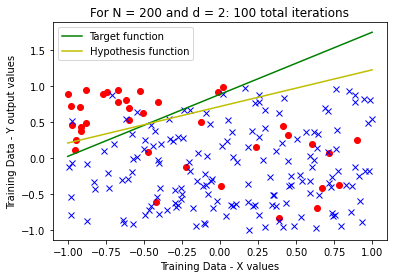

In [731]:
g_pocket, iterations_pocket, pocket_Ein,best_pocket_Ein = pocket(random_hypothesis, target_function,no_noise_data,noisy_data,iterations)
plot_pla(no_noise_data,ind_n_pos,ind_n_neg,target_function,g_pocket,d,N,iterations) #plot pocket algorithm

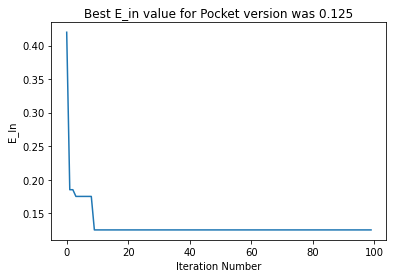

In [732]:
plot_error(pocket_Ein,"pocket")

**Run Linear Regression for noise = 10%**

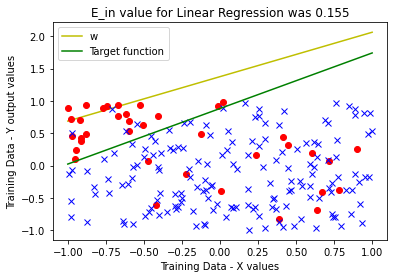

In [733]:
g_lin_regr, Ein = lin_regression(no_noise_data, noisy_data, Y_data)
plot_lin_regr(no_noise_data,ind_n_pos,ind_n_neg,target_function,g_lin_regr,d,N,Ein)

___
## Part 1c: 20% Noise

In [734]:
noise_level = 20

no_noise_data = get_training_data(N,d)
target_function = get_target_func(d)

Y_data, ind_pos, ind_neg = compute_true_value(no_noise_data,target_function)
noisy_data, ind_n_pos,ind_n_neg = get_noisy_data(noise_level,N,Y_data)

random_hypothesis = get_hyp_func(d)

**Run PLA for noise = 20%**

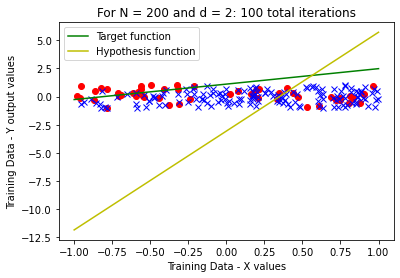

In [735]:
g, iterations, pla_Ein = perceptron(random_hypothesis, target_function,no_noise_data,noisy_data,iterations) #get data for PLA algorithm
plot_pla(no_noise_data,ind_n_pos,ind_n_neg,target_function,g,d,N,iterations) #plot PLA algorithm

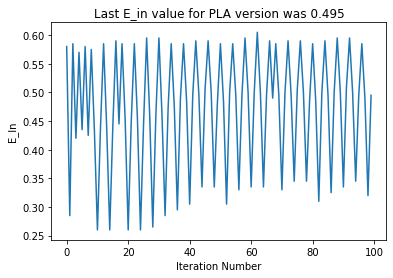

In [736]:
plot_error(pla_Ein, "pla") #plot error of PLA algorithm

**Run Pocket for noise = 20%**

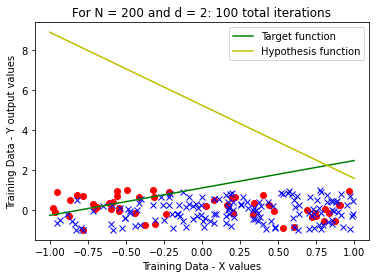

In [737]:
g_pocket, iterations_pocket, pocket_Ein,best_pocket_Ein = pocket(random_hypothesis, target_function,no_noise_data,noisy_data,iterations)
plot_pla(no_noise_data,ind_n_pos,ind_n_neg,target_function,g_pocket,d,N,iterations) #plot pocket algorithm

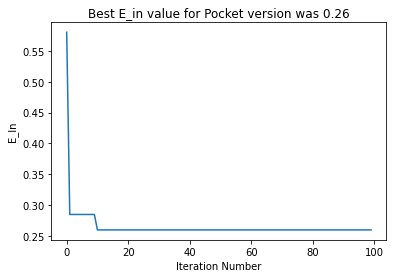

In [738]:
plot_error(pocket_Ein,"pocket")

**Run Linear Regression for noise = 20%**

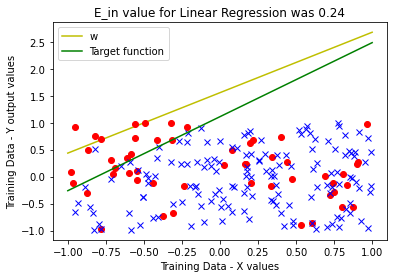

In [739]:
g_lin_regr, Ein = lin_regression(no_noise_data, noisy_data, Y_data)
plot_lin_regr(no_noise_data,ind_n_pos,ind_n_neg,target_function,g_lin_regr,d,N,Ein)

___
## Part 2: Feature Transform

## Part 2a: Generate 2D data, then transform it to 3D

In [740]:
N = 200
d = 2
iterations = 100

X = get_training_data(N,d)

In [741]:
def get_data_transform(N,d,X): #define transform function
    Z = np.zeros((np.shape(X)[0], np.shape(X)[1]+1))
    Z[:,0] = 1.
    Z[:,1] = X[:,1]**2
    Z[:,2] = X[:,2]**2
    Z[:,3] = X[:,1]*X[:,2]
    return Z

In [742]:
Z = get_data_transform(N,d,X)

In [743]:
target_hyperplane = get_target_func(d+1)

In [744]:
y_labels,ind_pos,ind_neg = compute_true_value(Z,target_hyperplane)


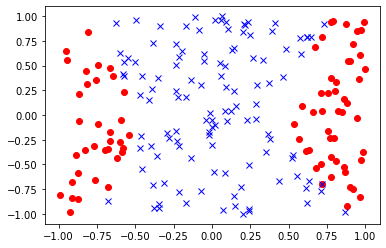

In [745]:
plt.plot(X[ind_pos,1],X[ind_pos,2],'ro') #plot pos points
plt.plot(X[ind_neg,1],X[ind_neg,2],'bx') #plot neg points

**Points are clearly non-linearly seperable in 2 dimensions.**
___

## Part 2b: Running Pocket Version with 2D non linearly seperable data for 100 iterations

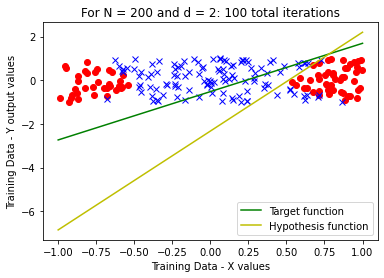

In [746]:
g_pocket, iterations_pocket, pocket_Ein,best_pocket_Ein = pocket(get_hyp_func(d),target_hyperplane,X,y_labels,iterations)
plot_pla(X,ind_pos,ind_neg,target_hyperplane,g_pocket,d,N,iterations) #plot pocket algorithm

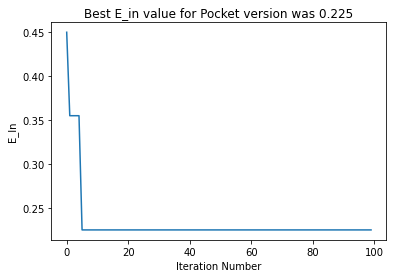

In [747]:
plot_error(pocket_Ein,"pocket")

___

## Part 2c: Running linear regression with 2D non-linearly seperable data

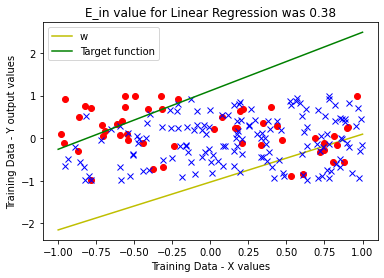

In [748]:
g_lin_regr, Ein = lin_regression(X,y_labels,y_labels)
plot_lin_regr(no_noise_data,ind_n_pos,ind_n_neg,target_function,g_lin_regr,d,N,Ein)

___

## Part 2d: Running PLA with 3D data for 10,000 iterations

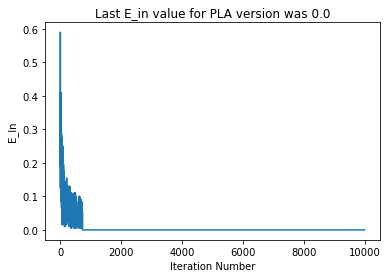

In [749]:
g, iterations, pla_Ein = perceptron(get_hyp_func(d+1), target_hyperplane,Z,y_labels,10000) #get data for PLA algorithm
plot_error(pla_Ein, "pla") 

**Depending on the randomly chosen intial guess, it may take more than 100 iterations to seperate the data in 3D, thus I ran the algorithm for 10,000 iterations to ensure success.**